# Candidate Test 2022 Analysis Part 2

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2). Consider normalizing the data or performing similar scaling transformations as needed.

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:

- An analysis/description of which questions are most crucial concerning their placement on the axes.
- Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.
- A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**
- An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.
- Feel free to explore further and remember that preprocessing, methodology, and evaluation metrics are not mentioned explicitly, but are implicitly assumed.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



Preprocessing


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = pd.read_excel('alldata.xlsx')

data.drop(data[data['parti'] == 'Løsgænger'].index, inplace=True)

median_age = data['alder'].median()
data['alder'].replace(0, median_age, inplace=True)

party_labels = data['parti'].copy()


columns_to_drop = ["navn", "alder", "parti", "storkreds"]
data_questions = data.drop(columns=columns_to_drop)

C:\Users\Jesper Kristensen\AppData\Local\Temp\ipykernel_3328\2134975216.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['alder'].replace(0, median_age, inplace=True)


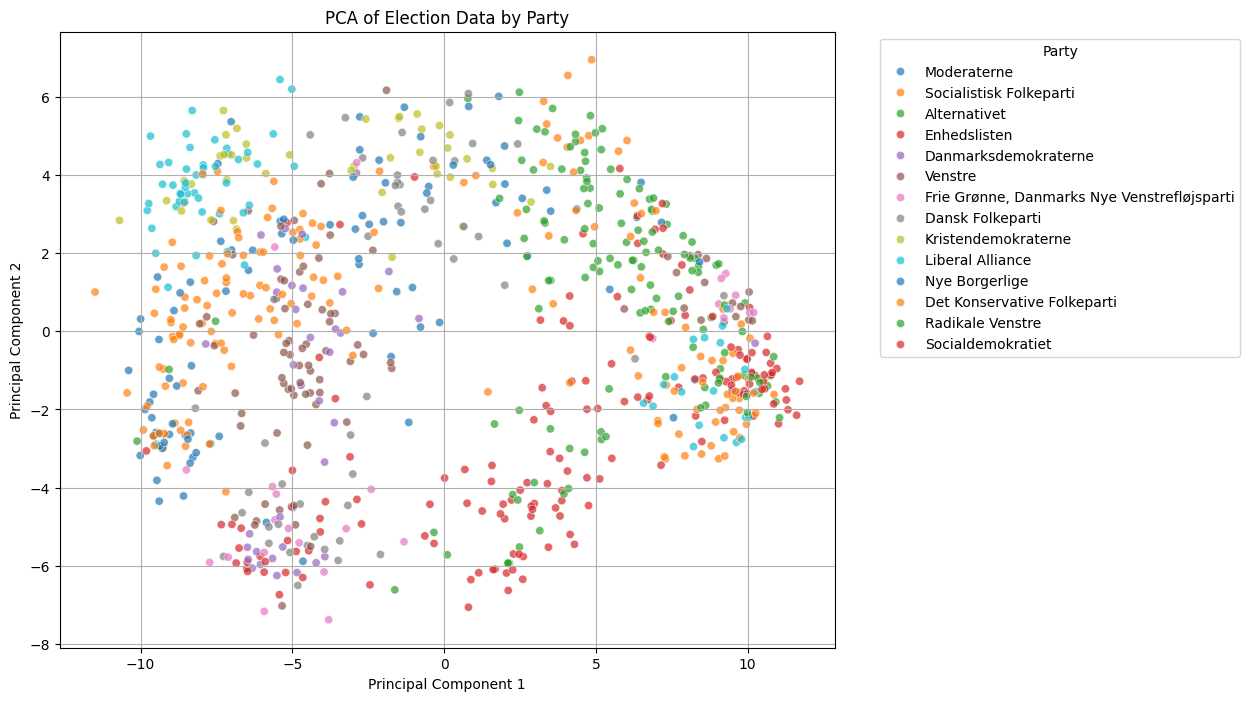

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pca = PCA(n_components=2)  
principal_components = pca.fit_transform(data_questions)

data['PCA_1'] = principal_components[:, 0]
data['PCA_2'] = principal_components[:, 1]

# DataFrame with the PCA
pca_df = pd.DataFrame(data = principal_components, columns = ['PCA_1', 'PCA_2'])

# Adding back the 'parti' labels to the DataFrame
pca_df['Party'] = party_labels

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='Party', data=pca_df, palette='tab10', alpha=0.7)
plt.title('PCA of Election Data by Party')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [4]:
PCA1_abs = [abs(number) for number in pca.components_[0]]

PCA1 = pd.DataFrame({
    'feature_names': data_questions.columns,
    'PCA': pca.components_[0],
    'PCA_abs': PCA1_abs,
})

sorted_df1 = PCA1.sort_values(by='PCA_abs', ascending=False)


In [5]:
PCA2_abs = [abs(number) for number in pca.components_[1]]
PCA2 = pd.DataFrame({
    'Feature Names': data_questions.columns,
    'PCA': pca.components_[1],
    'PCA_abs': PCA2_abs,
})

# Sorting the DataFrame to show most influential features for PCA2
sorted_df2 = PCA2.sort_values(by='PCA_abs', ascending=False)

print("Top Influential Questions for PCA1:")
print(sorted_df1.head())

print("Top Influential Questions for PCA2:")
print(sorted_df2.head())

Top Influential Questions for PCA1:
   feature_names       PCA   PCA_abs
1            531  0.205543  0.205543
15           550  0.205029  0.205029
30            3b  0.204083  0.204083
5            537 -0.198837  0.198837
9            543 -0.193089  0.193089
Top Influential Questions for PCA2:
   Feature Names       PCA   PCA_abs
20           556  0.356352  0.356352
44           10b -0.354410  0.354410
16           551 -0.298708  0.298708
18           553 -0.250712  0.250712
19           555 -0.243986  0.243986


By importance the questions are listed as follows: Featue_name PCA1:
531, 
550,
3b,
537,
543 

PCA2:
556, 10b, 551,553,555

In [8]:
# Load or prepare your questions dataframe here we need the party column 

unnessesary_columns = ["navn", "alder", "storkreds"] 

party_dataFrame = pd.read_excel('alldata.xlsx')

party_dataFrame = party_dataFrame.drop(labels=unnessesary_columns, axis=1)
by_party = party_dataFrame.groupby('parti').mean()



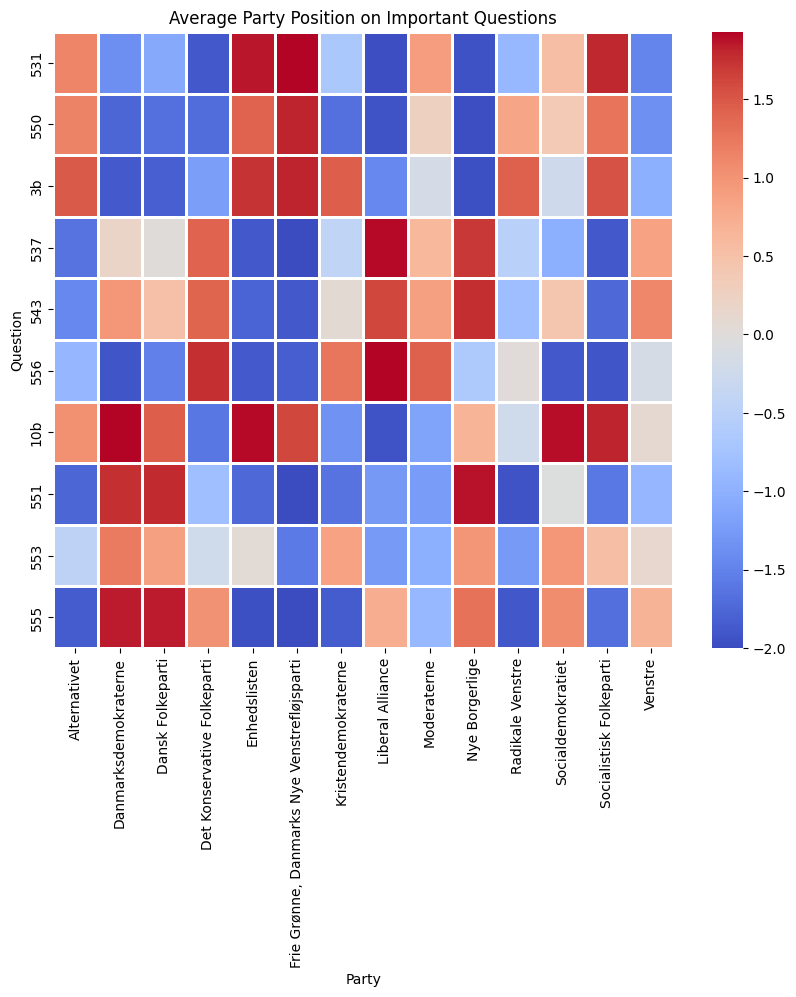

In [12]:
# Selecting the most crucial questions fomr the PCA1 and pca2 analasys and show how the parti are positioned on these questions

important_questions = ['531', '550', '3b', '537', '543', '556', '10b', '551', '553', '555']

by_party = by_party[important_questions]
by_party = by_party.drop(labels=['Løsgænger'])
by_party = by_party.T

plt.figure(figsize=(10, 8))
sns.heatmap(by_party, cmap='coolwarm', linecolor='white', linewidth=1)
plt.title('Average Party Position on Important Questions')
plt.xlabel('Party')
plt.ylabel('Question')
plt.show()

C:\Users\Jesper Kristensen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


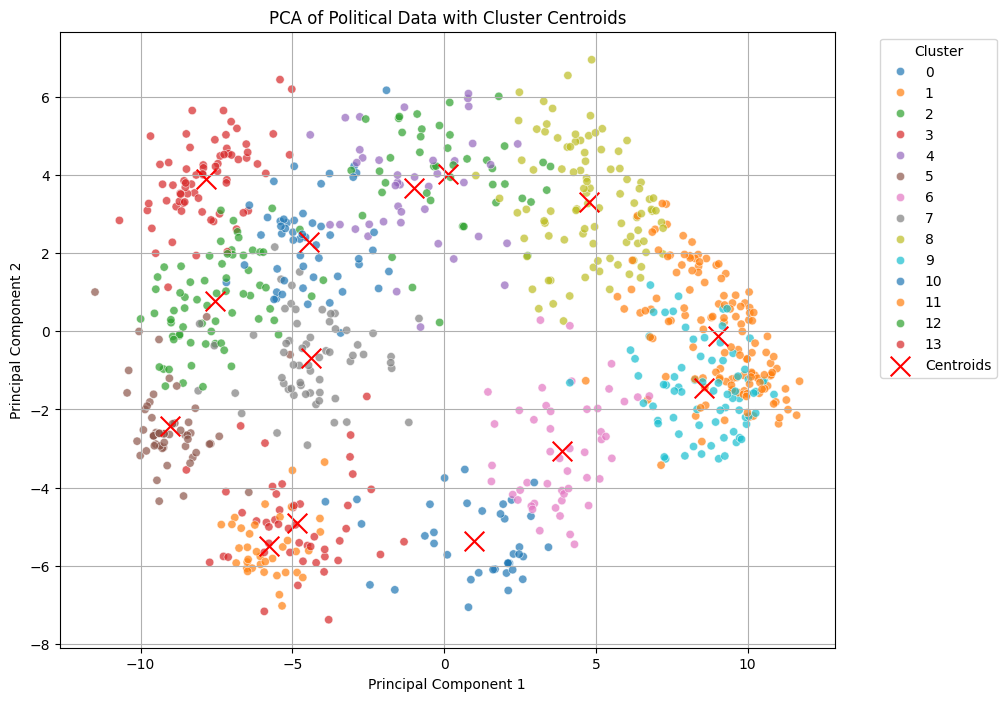

In [ ]:
### A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. 
#Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**

#Kmeans
from sklearn.cluster import KMeans

#14 parties

kmeans = KMeans(n_clusters=14, random_state=42)
kmeans.fit(data_questions)
data['Cluster'] = kmeans.labels_

centroids = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='Cluster', data=data, palette='tab10', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')
plt.title('PCA of Political Data with Cluster Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


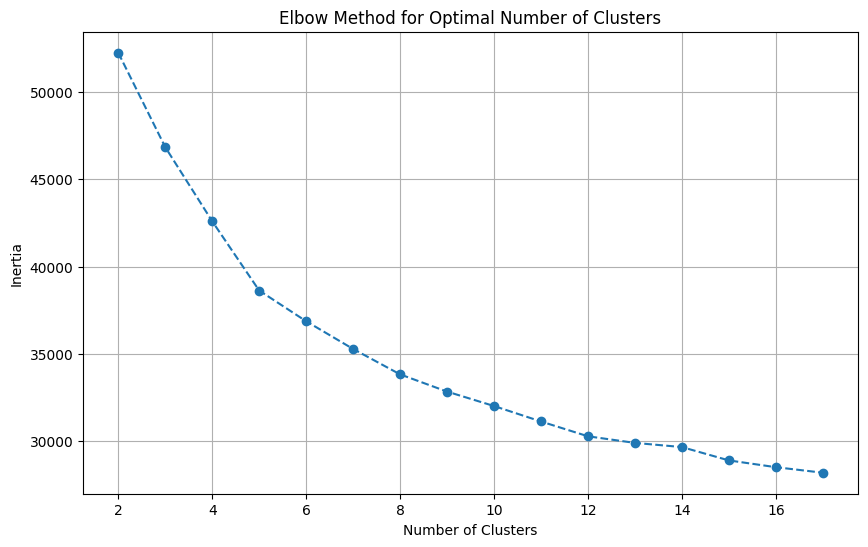

In [15]:
inertia = []
for n_clusters in range(2, 18):  
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(data_questions)
    inertia.append(kmeans.inertia_)

# plpotting in order to visualize the "elbow"
plt.figure(figsize=(10, 6))
plt.plot(range(2, 18), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

C:\Users\Jesper Kristensen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


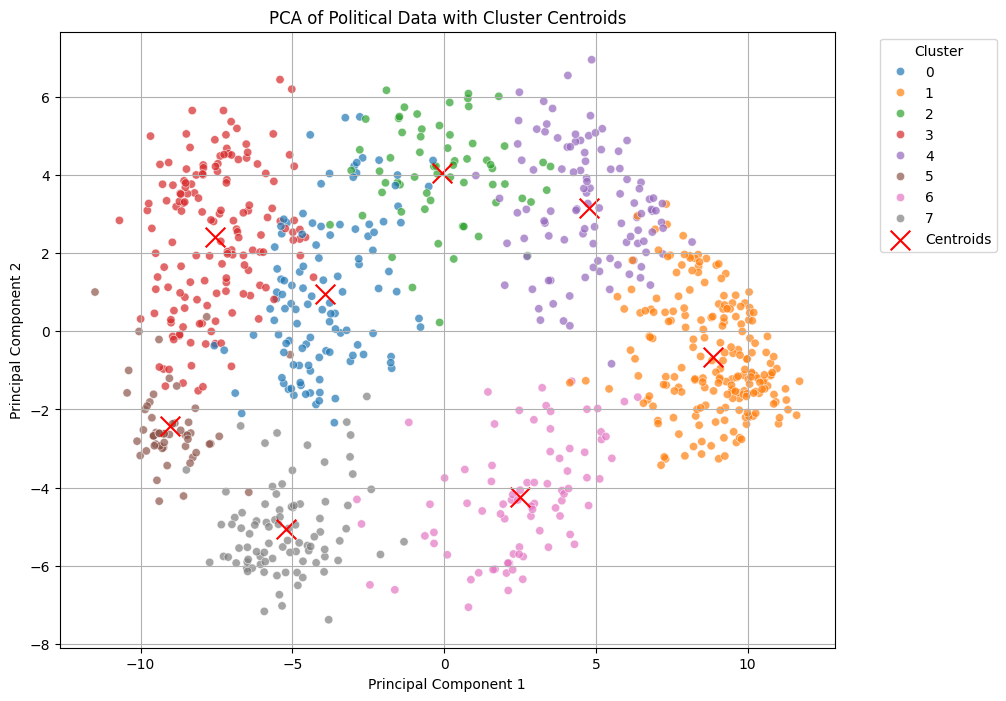

In [19]:
#on the elblow method we can deem the optimal number of clusters to be aroud 8
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(data_questions)
data['Cluster'] = kmeans.labels_

# Transformer centroids to PCA space
centroids = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='Cluster', data=data, palette='tab10', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')
plt.title('PCA of Political Data with Cluster Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

This clearly makes a more clear clustering of the data. Which might tell us that the 14 parties isn't as diverse in their opinions, and might overlap a whole lot. 

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [50.0, 50.0, 72.5, 72.5],
  [35.0, 35.0, 61.25, 61.25],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [143.75, 143.75, 183.75, 183.75],
  [125.0, 125.0, 163.75, 163.75],
  [115.0, 115.0, 144.375, 144.375],
  [105.0, 105.0, 129.6875, 129.6875],
  [95.0, 95.0, 117.34375, 117.34375],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [106.171875, 106.171875, 222.5, 222.5],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [275.0, 275.0, 285.0, 285.0],
  [252.5, 252.5, 280.0, 280.0],
  [164.3359375, 164.3359375, 266.25, 266.25],
  [48.125, 48.125, 215.29296875, 215.29296875],
  [12.5, 12.5, 131.708984375, 131.708984375],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.

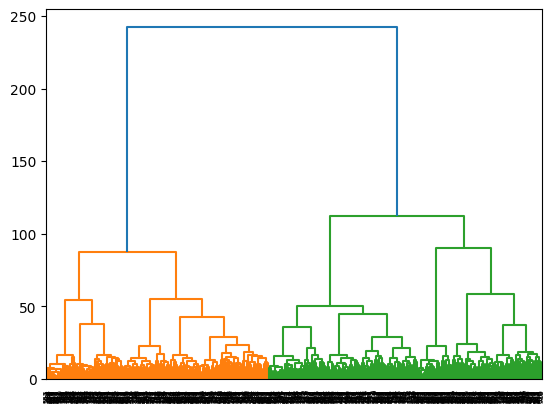

In [20]:
from scipy.cluster.hierarchy import dendrogram, ward
linkage_array = ward(data_questions) #ward is a method for hierarchical clustering
dendrogram(linkage_array)

based on the graph above should we have have two different groups but because we are looking at the parties and we know there is 14 of those will we continue with this

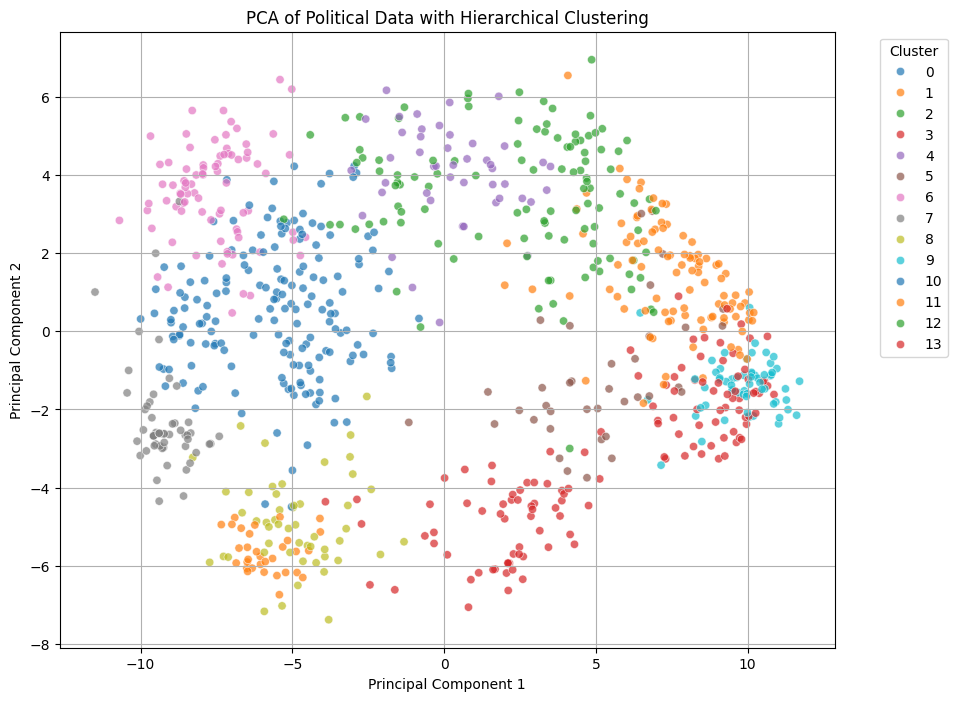

In [22]:
#Hierarchical clustering

from sklearn.cluster import AgglomerativeClustering

# 14 clusters
hierarchical = AgglomerativeClustering(n_clusters=14)
data['Cluster'] = hierarchical.fit_predict(data_questions)

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='Cluster', data=data, palette='tab10', alpha=0.7)
plt.title('PCA of Political Data with Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

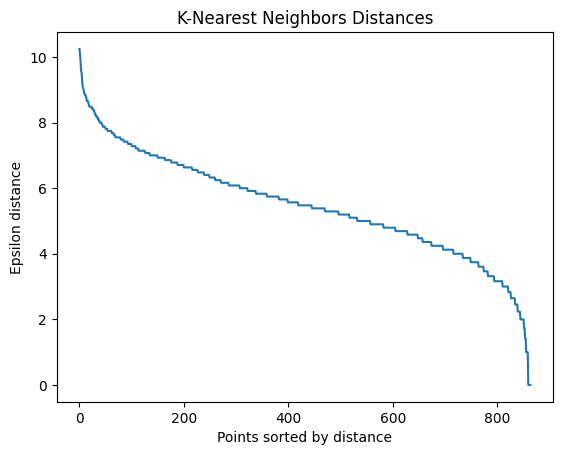

In [23]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=48) 
neighbors_fit = neighbors.fit(data_questions)
distances, indices = neighbors_fit.kneighbors(data_questions)


distances = np.sort(distances, axis=0)[::-1]
distances = distances[:,1]
plt.plot(distances)
plt.title('K-Nearest Neighbors Distances')
plt.xlabel('Points sorted by distance')
plt.ylabel('Epsilon distance')
plt.show()

In [24]:
#From the elbow model, we can see that the optimal number of clusters is between 6 and 9, and the range i set manually set to 10-100
# then we get the silhouette score for each combination of eps and min_samples values, and print the best. For later use. 
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.cluster import DBSCAN

eps_values = np.arange(6, 9, 0.1)  
min_samples_values = range(2, 100, 10)  
best_score = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_questions)
        if len(set(labels)) > 1: # a check to see if there are more than one cluster, since that is nessesary for silhouette score
            score = silhouette_score(data_questions, labels)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}

print(f"Best parameters were eps={best_params['eps']} and min_samples={best_params['min_samples']}")


Best parameters were eps=8.59999999999999 and min_samples=92


Clusters found: [-1  0  1]


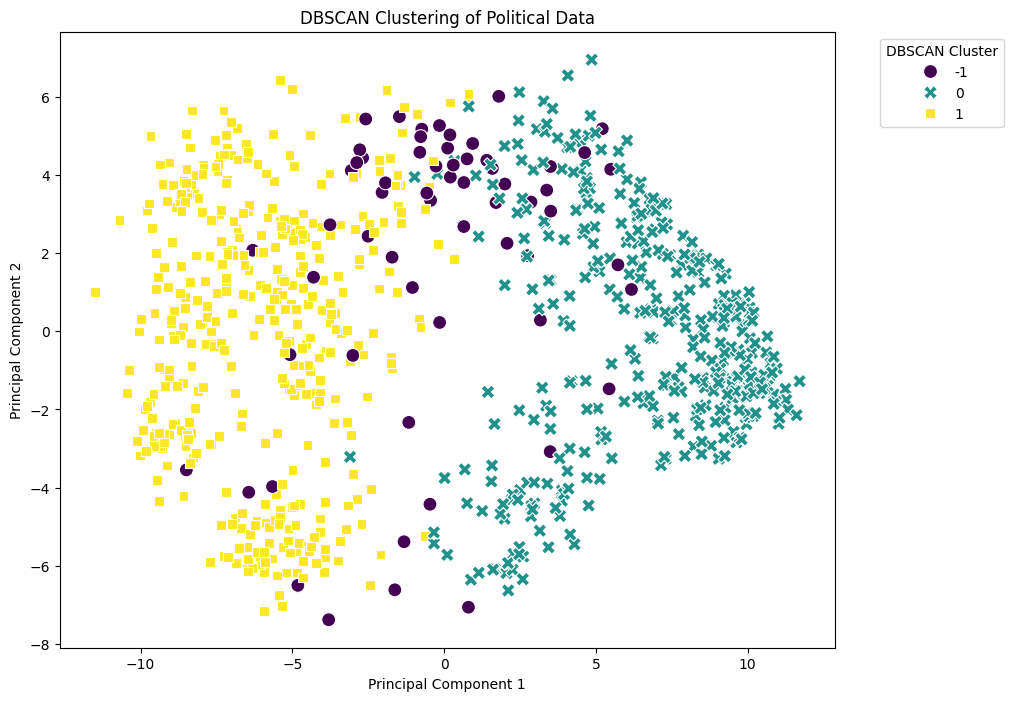

In [25]:
#DBScan. From our k-nearest neighbors plot we can see that the optimal epsilon value is around 8.
# the min_samples value is set to 80 due to some manual tuning. 



# The output from the silhouette score. 
dbscan = DBSCAN(eps=8.6, min_samples=92)
clusters = dbscan.fit_predict(data_questions)

data['DBSCAN_Cluster'] = clusters

import numpy as np

print("Clusters found:", np.unique(clusters))

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='DBSCAN_Cluster', data=data, palette='viridis', style='DBSCAN_Cluster', s=100)
plt.title('DBSCAN Clustering of Political Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='DBSCAN Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

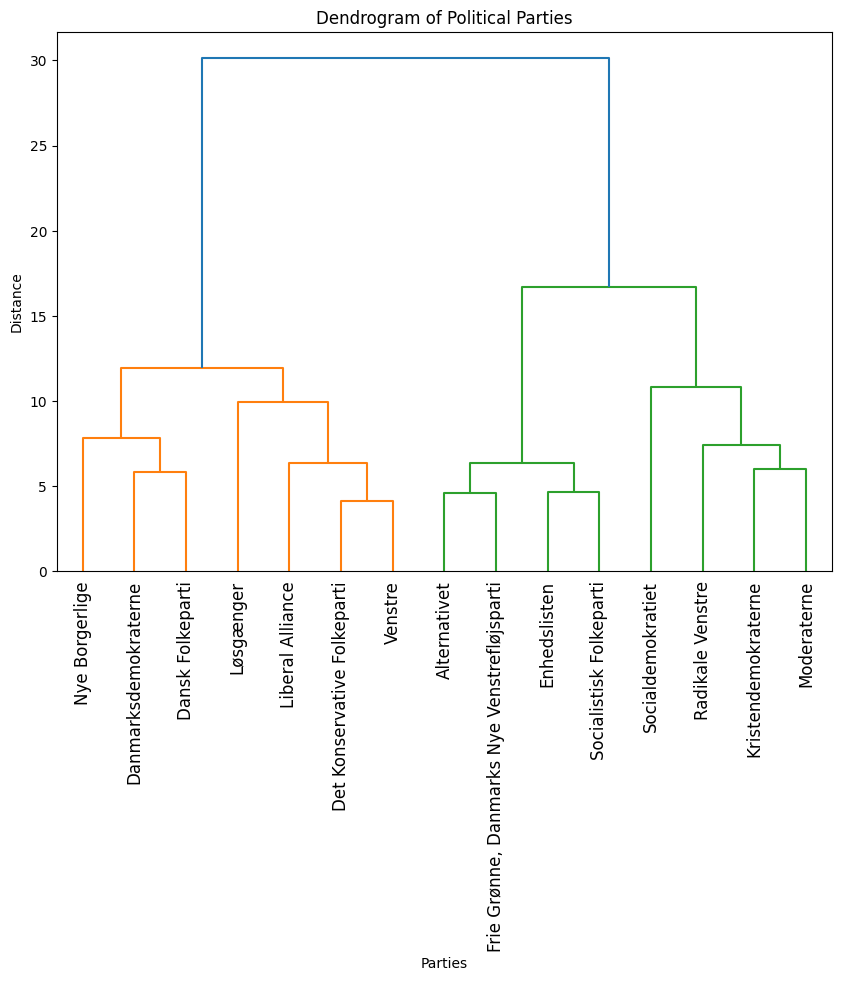

In [26]:
# to Picture the policital landscape in Denmark, we used a dendrogram to show the relationship between the parties

import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

data = pd.read_excel('alldata.xlsx')

data = data.drop(['navn', 'storkreds', 'alder'], axis=1)

party_aggregates = data.groupby('parti').mean()

linkage_matrix = linkage(party_aggregates, method='ward')

# Create a dendrogram to visualize the clustering
plt.figure(figsize=(10, 7))
dendrogram(
    linkage_matrix,
    labels=party_aggregates.index.tolist(),  
    leaf_rotation=90.,     
    leaf_font_size=12.,    
)
plt.title('Dendrogram of Political Parties')
plt.xlabel('Parties')
plt.ylabel('Distance')
plt.show()

the dendrogram shows that the parties are clustered into 2 , and the general view is the parties cluster in accordance to the how they "cooperate" with each other in real lift.

Other remarks: the clustering shows are some what clustered in their political view. But there are overlaps, that might indicate that the parties are not as different as they might seem.

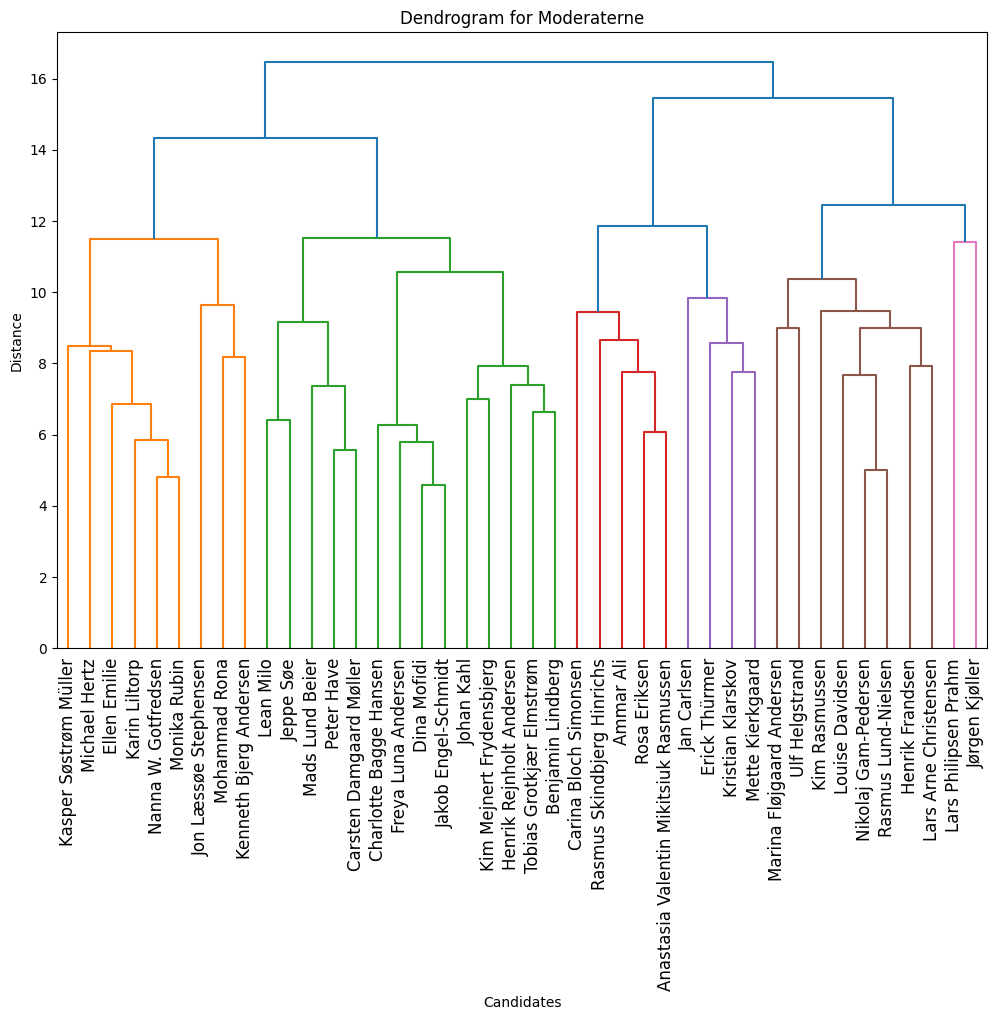

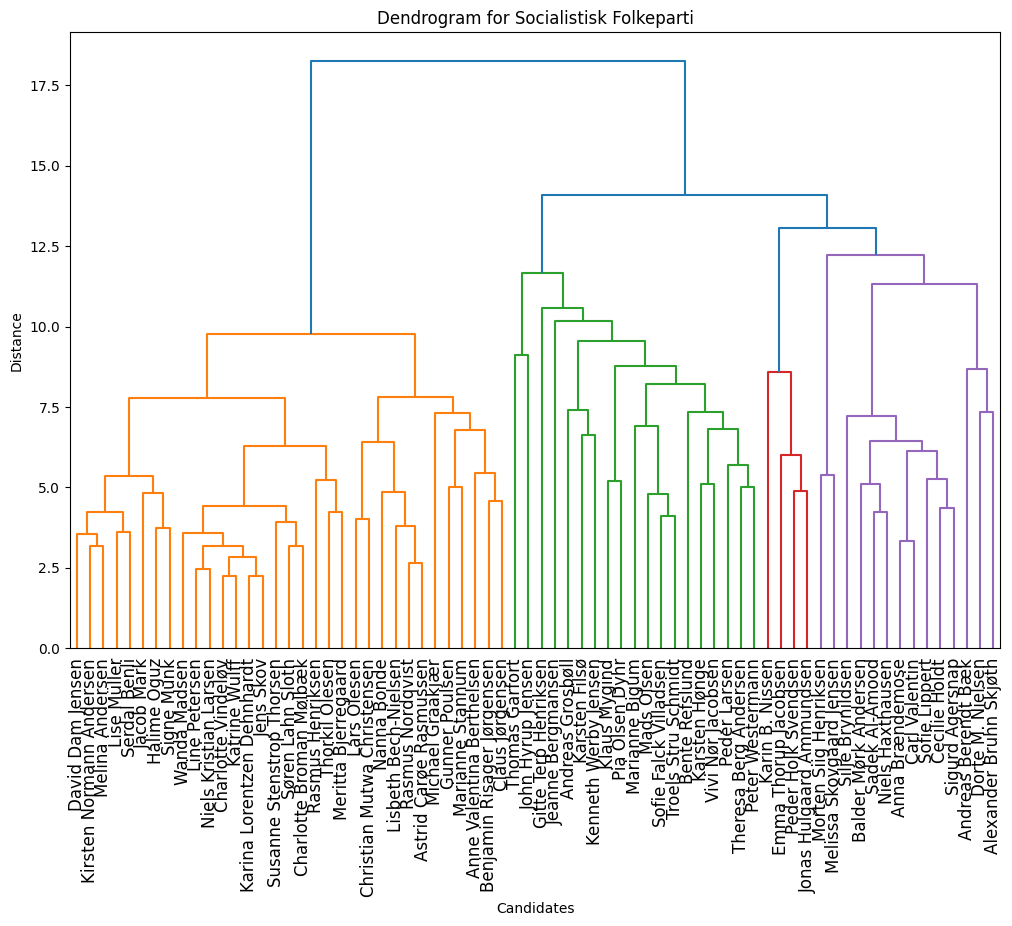

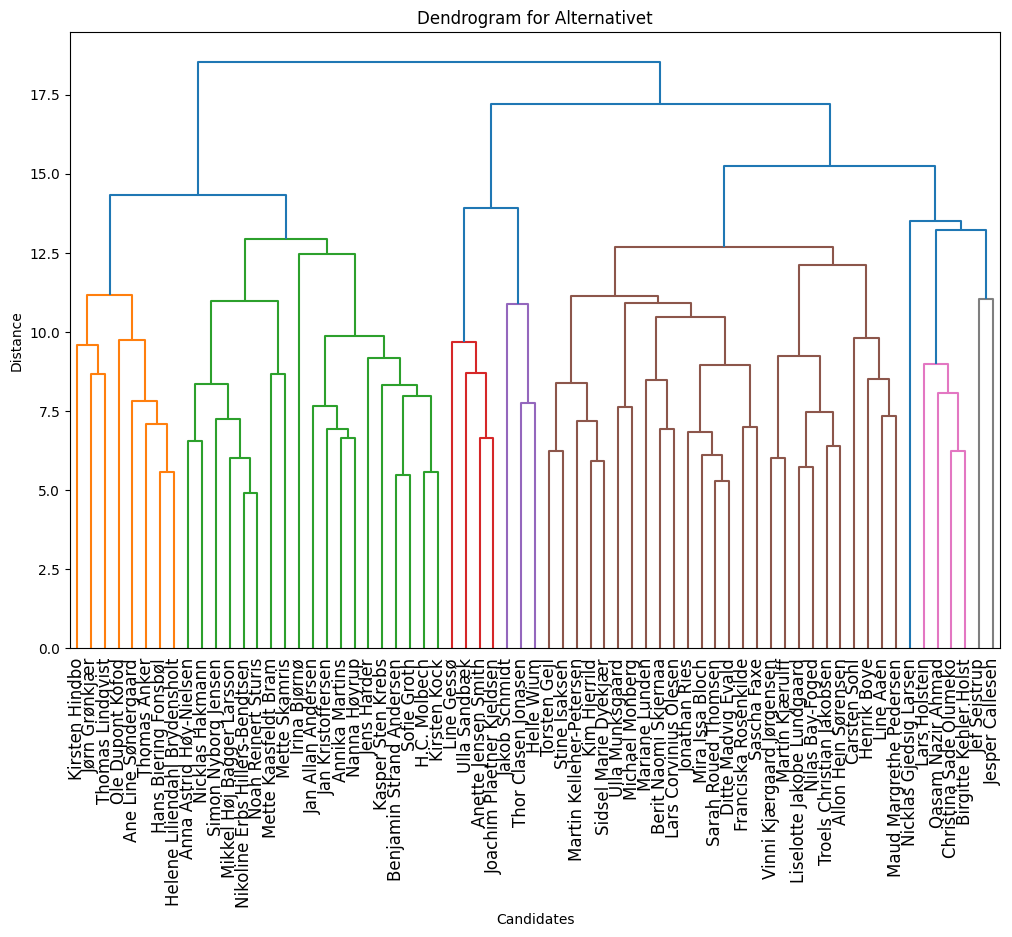

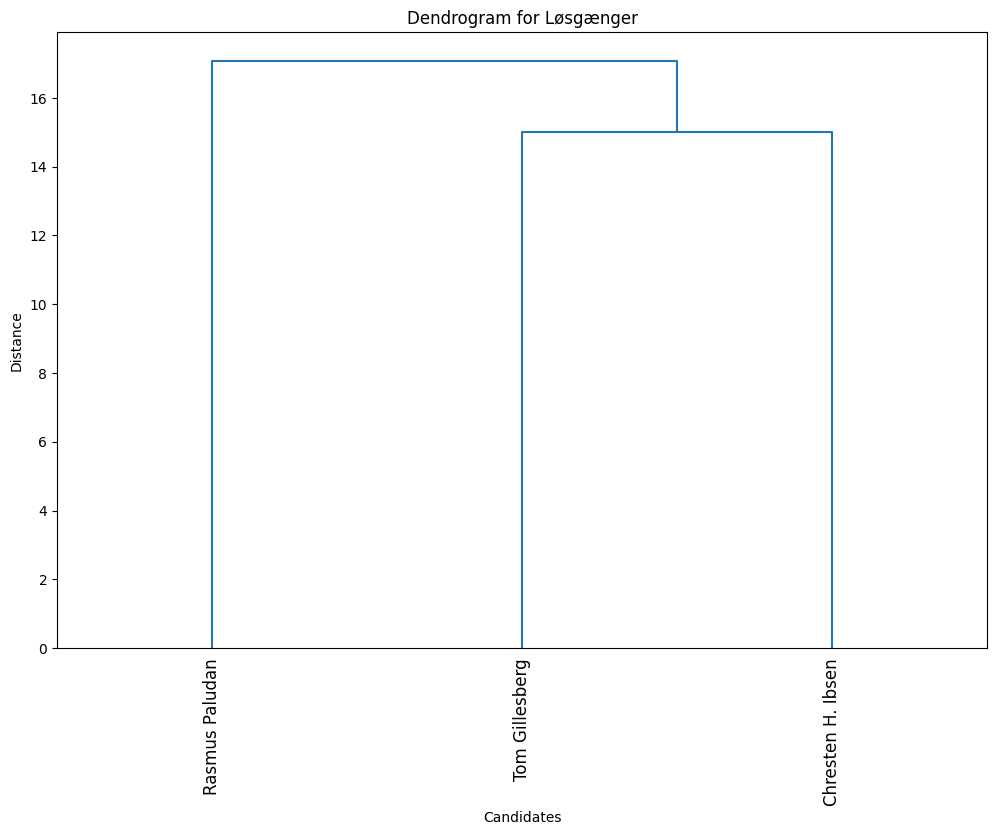

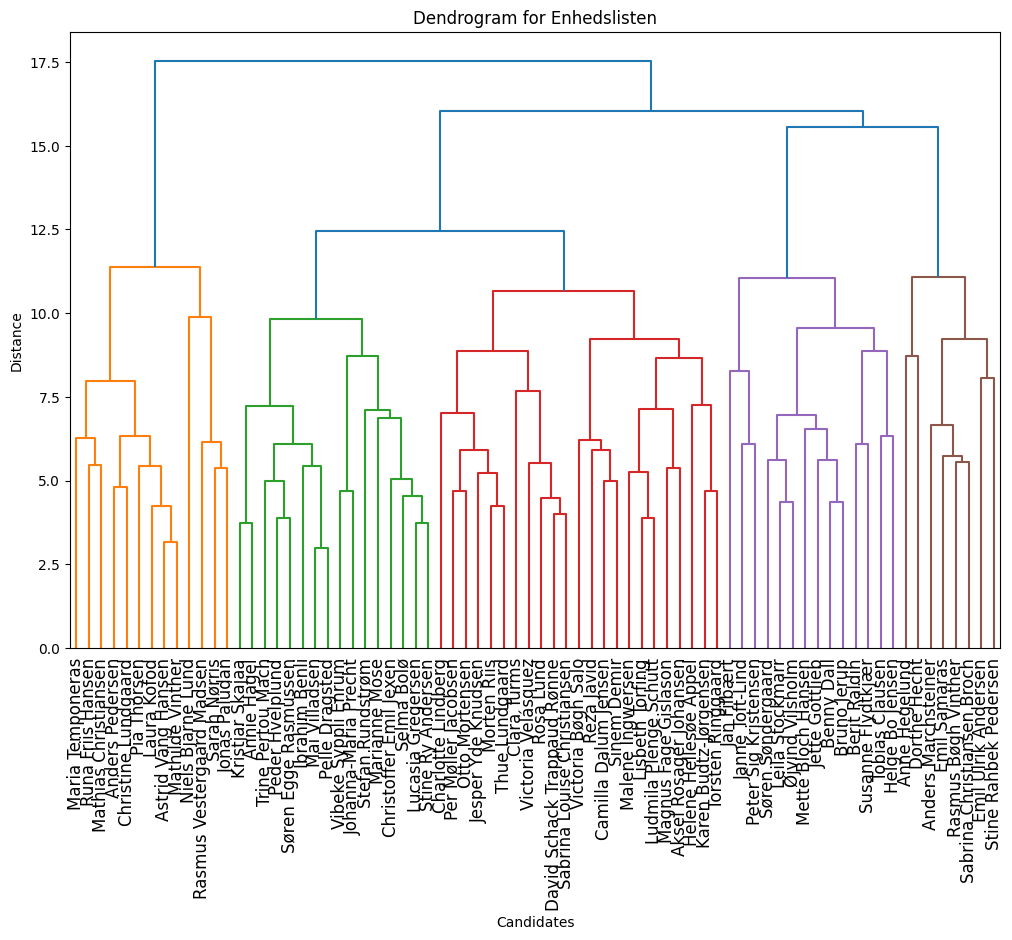

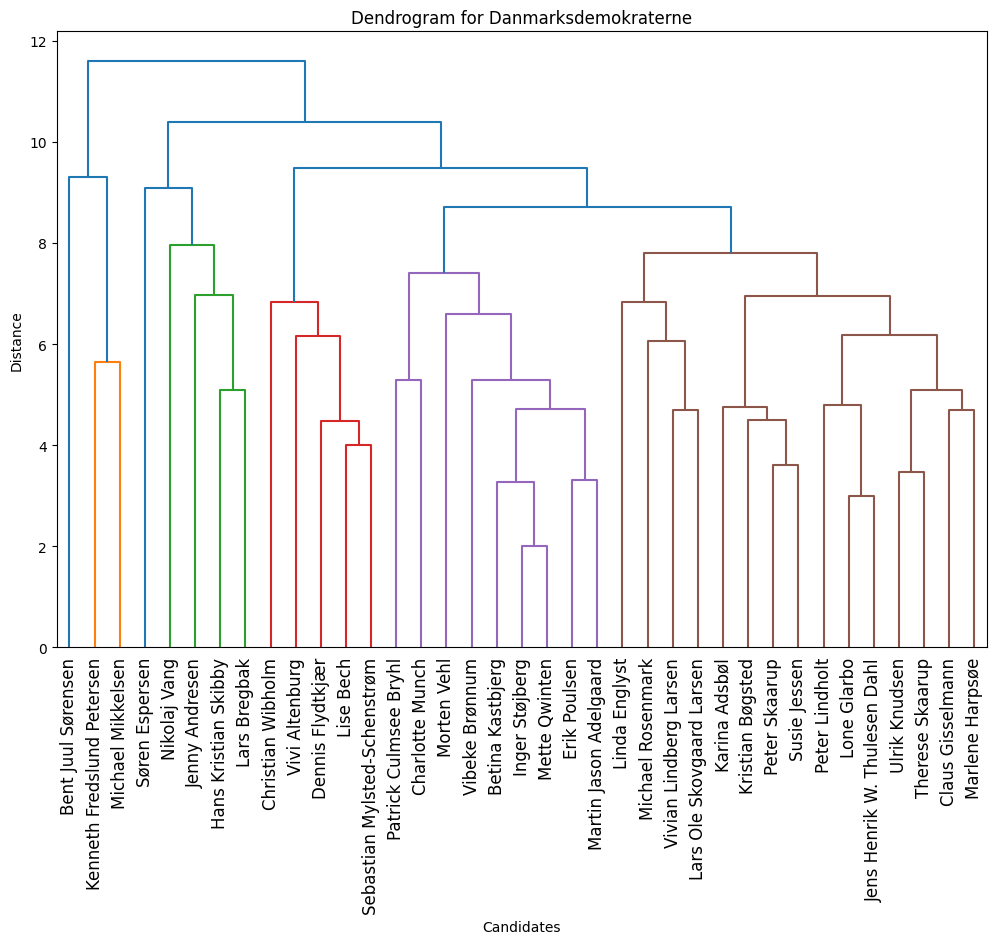

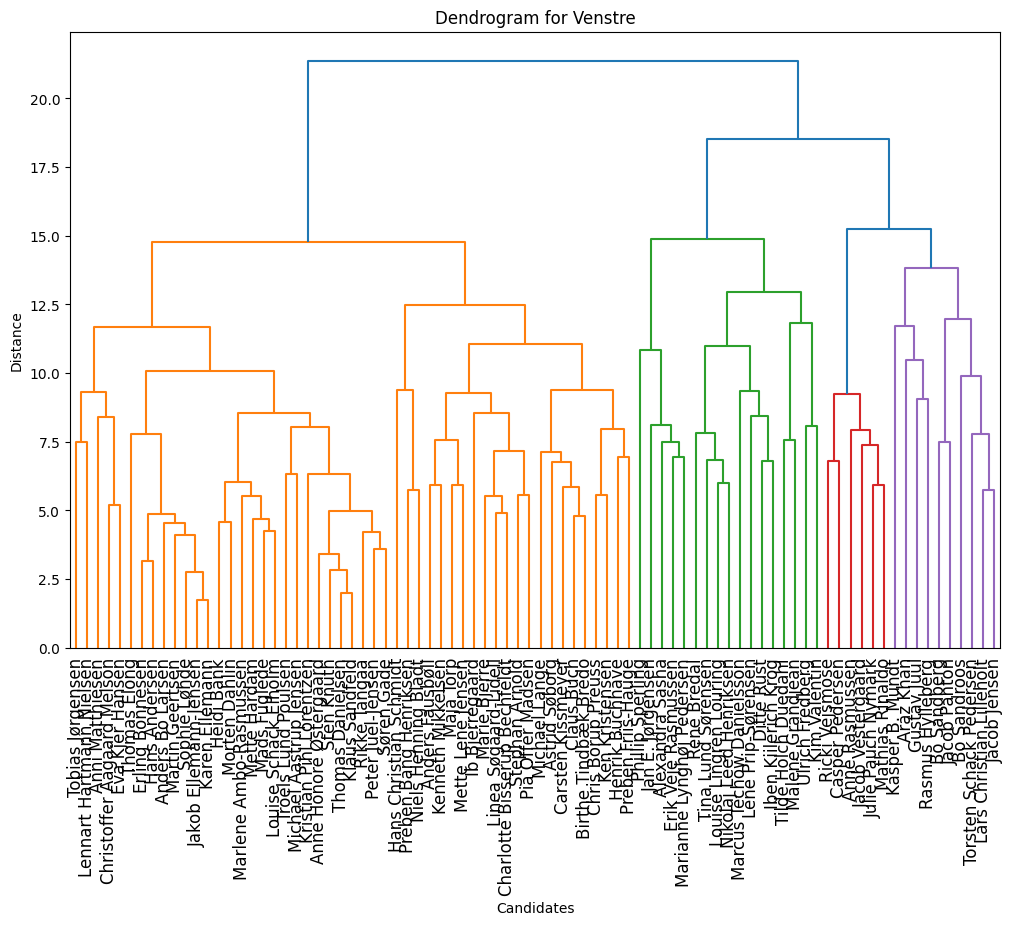

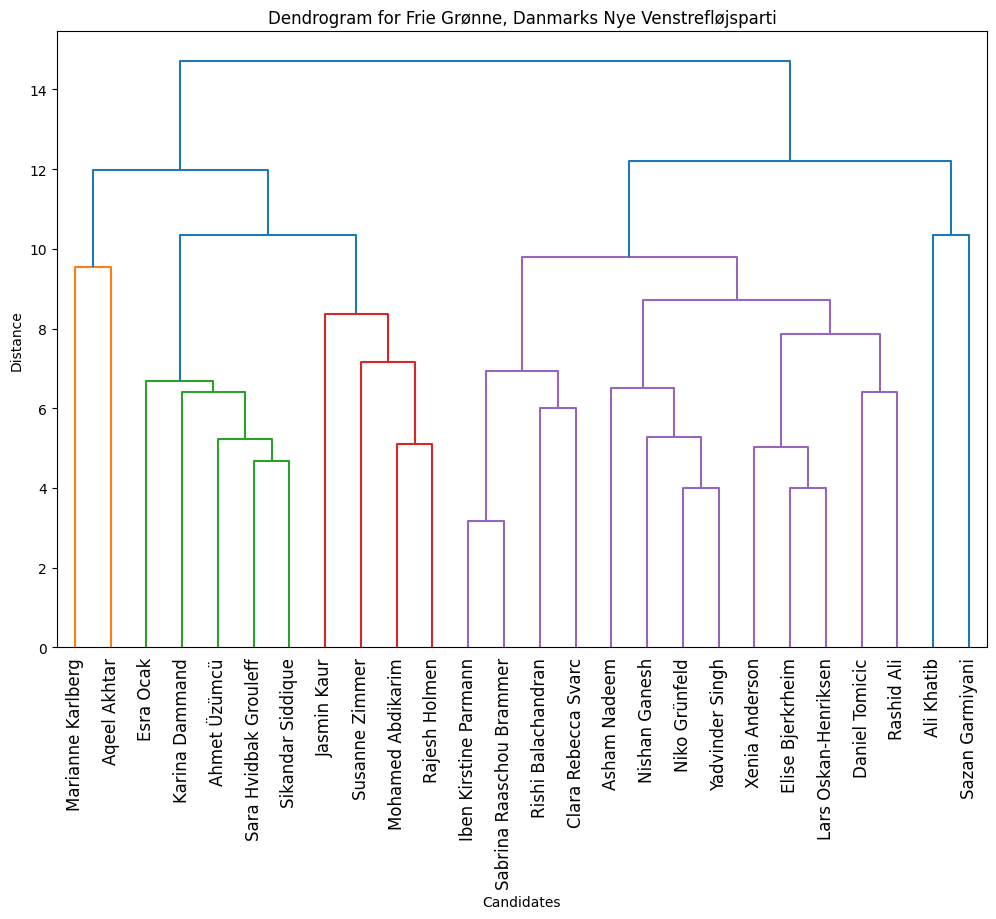

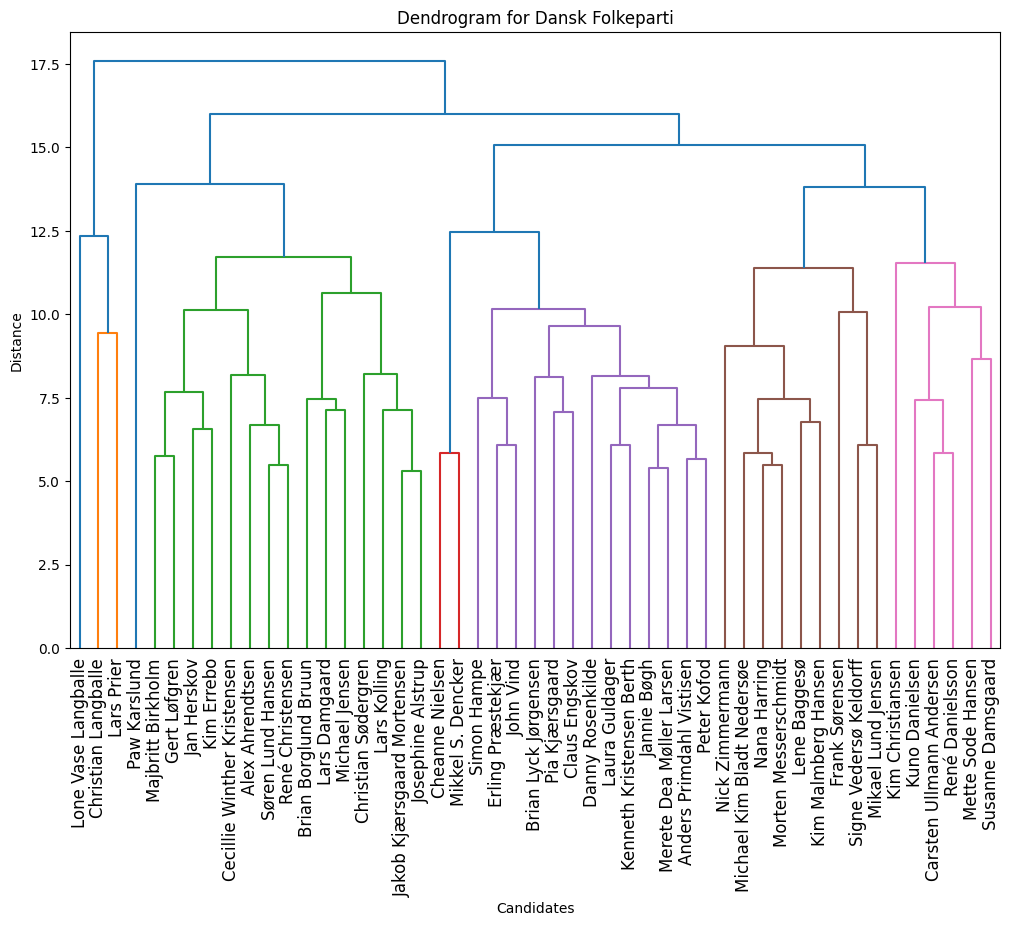

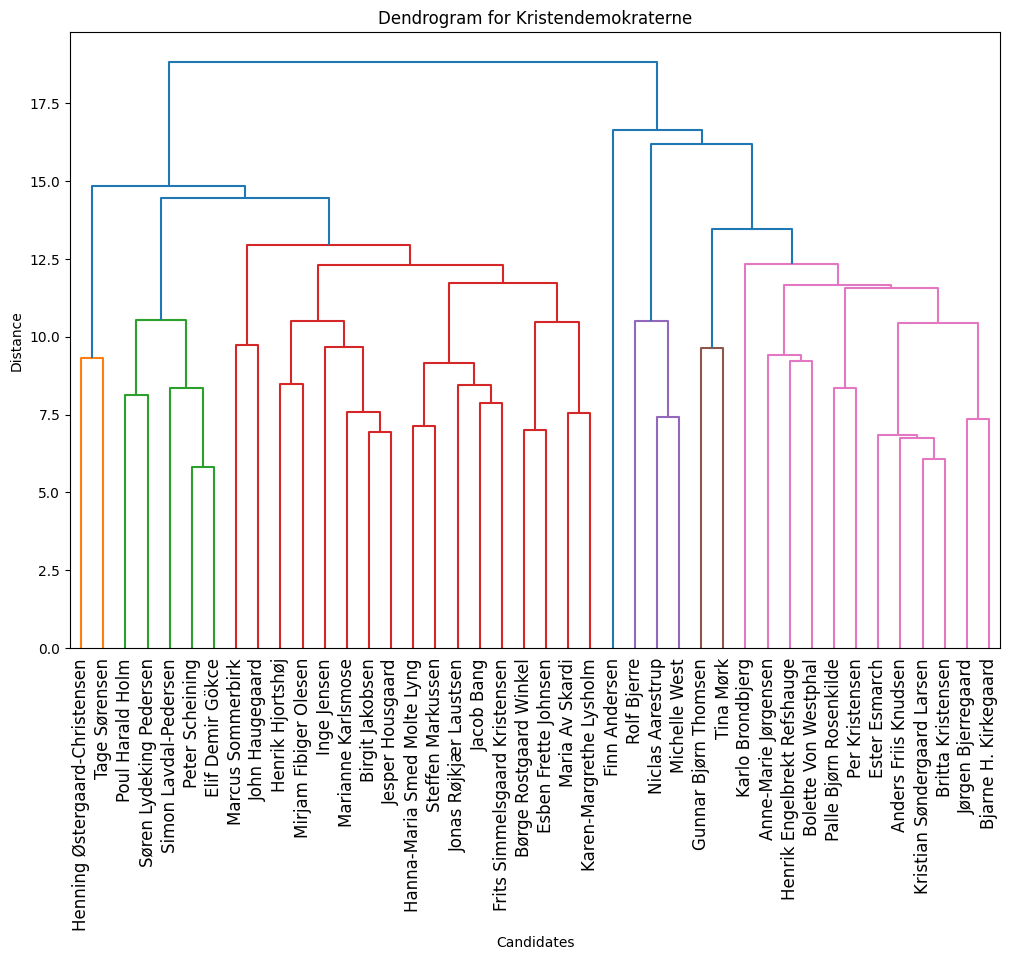

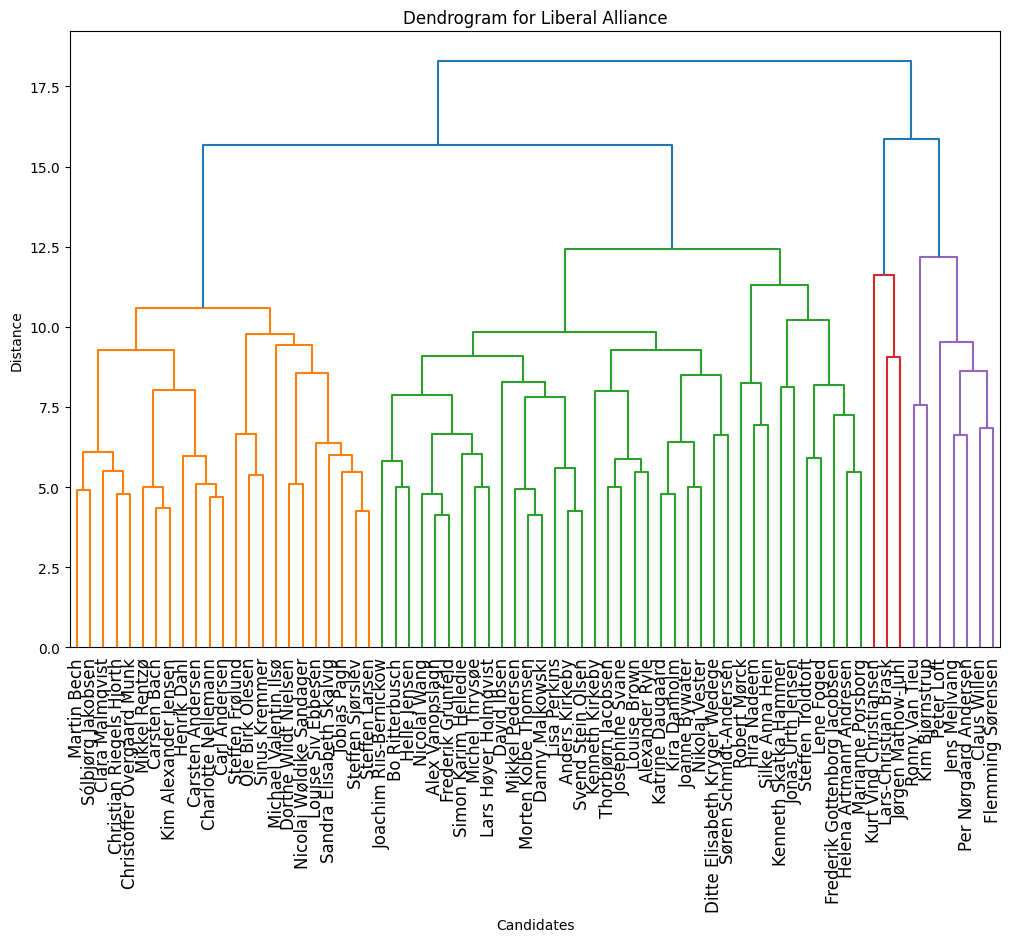

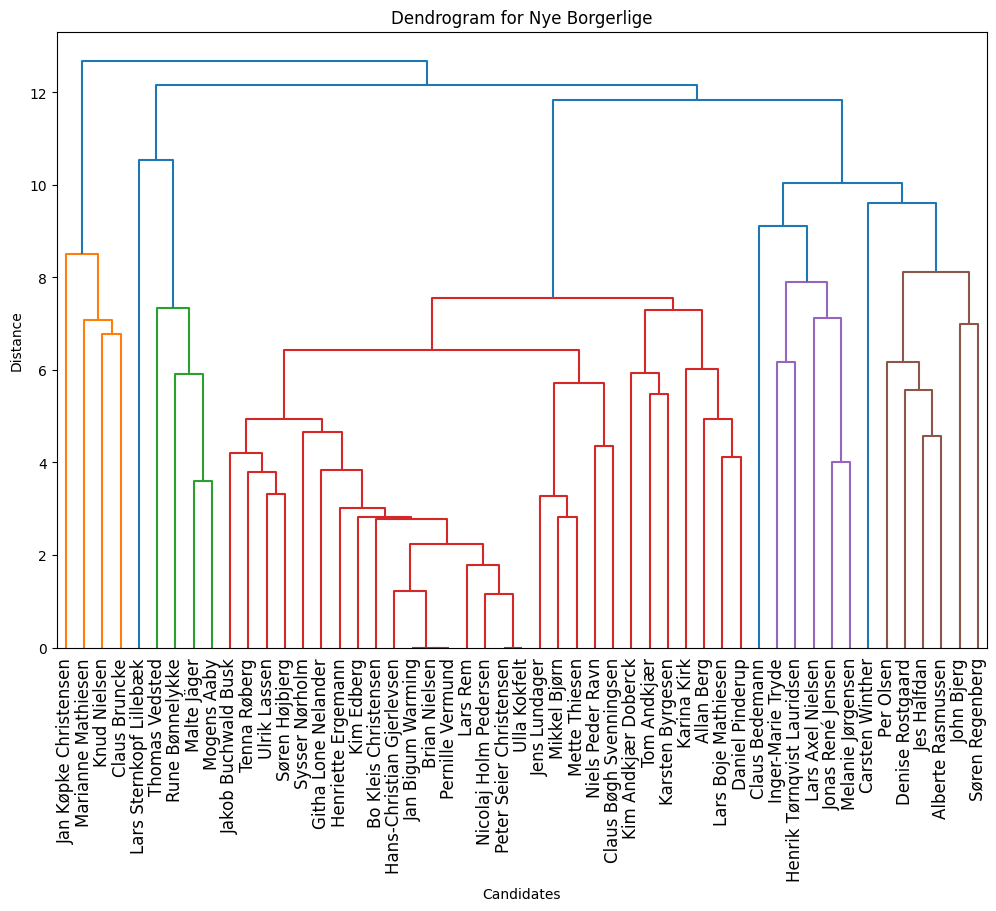

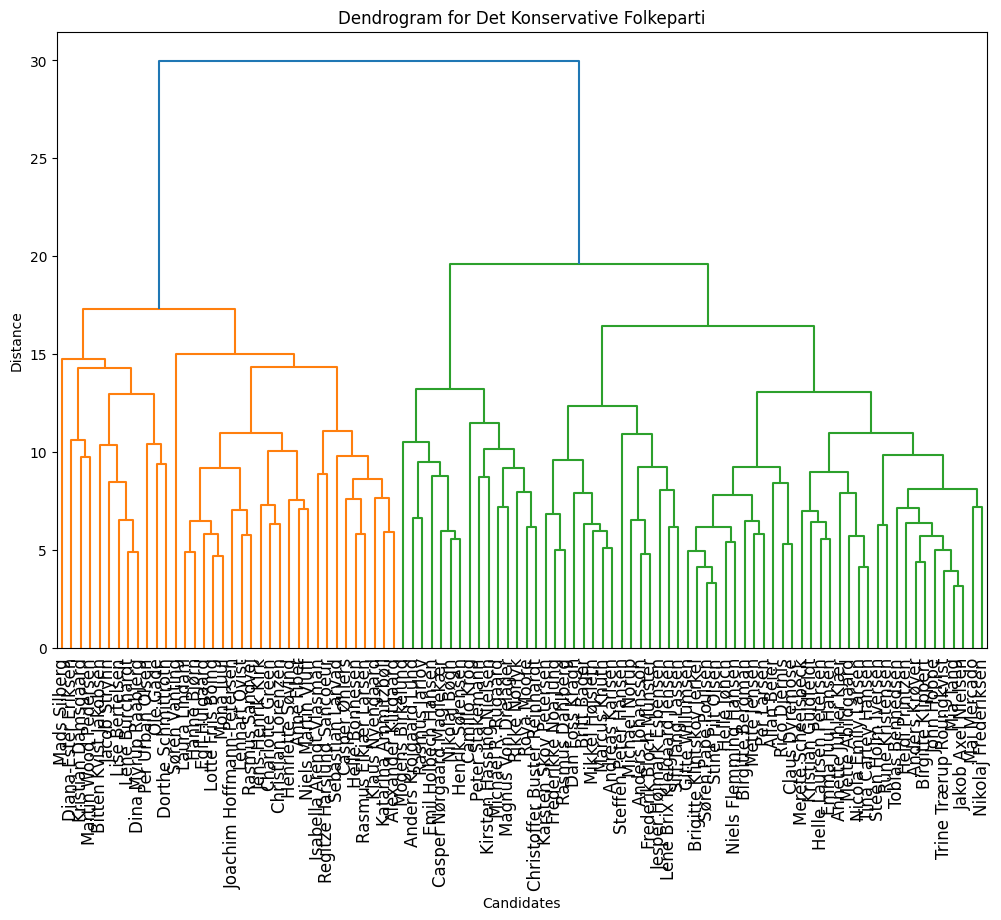

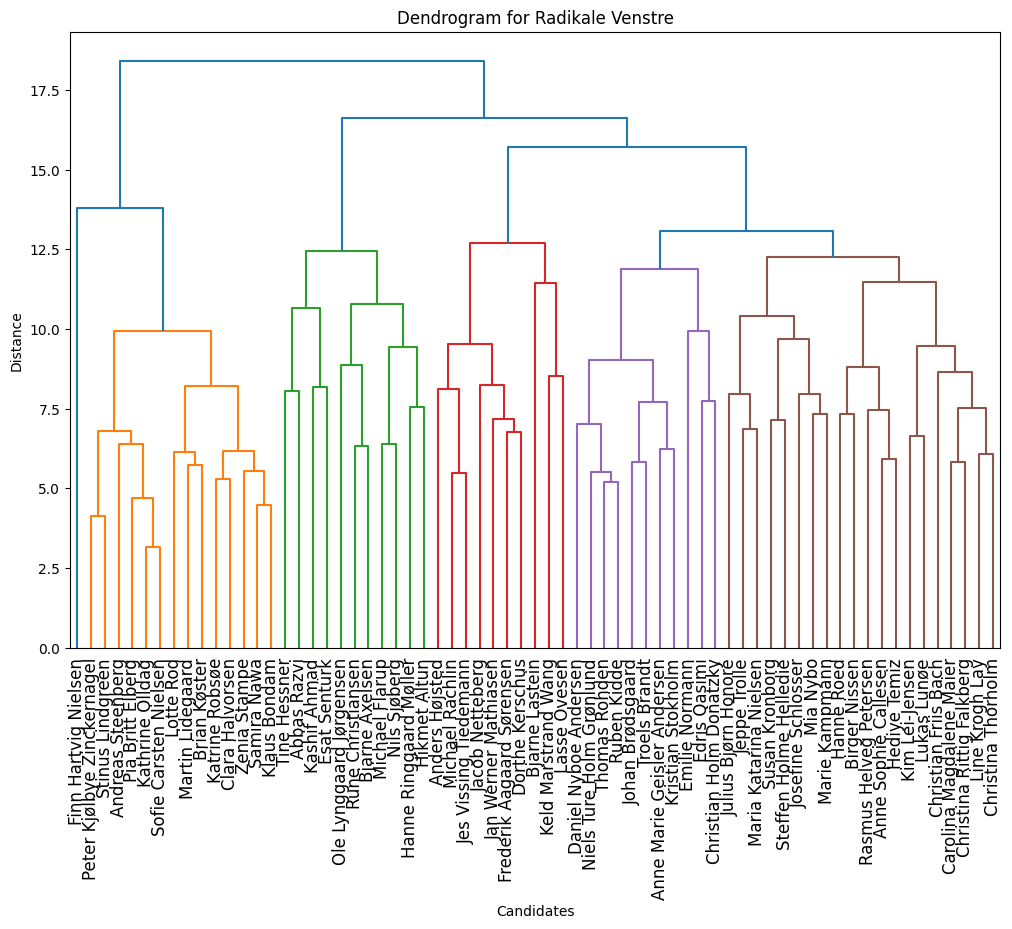

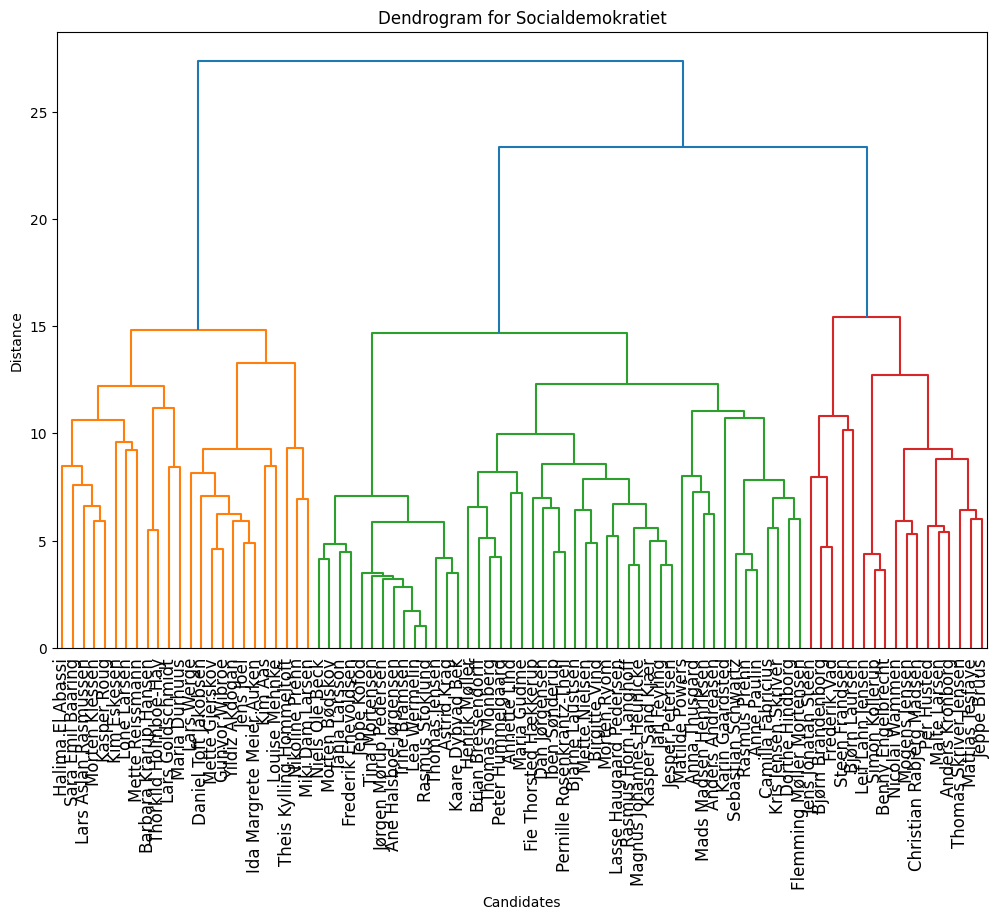

In [27]:

# In order to take a closer look at the candidates, we can use a dendrogram to show the relationship between the candidates in each party. This might be usefull in order to detect fractaion within a party. 
# An assumption could be made, that a party with a high distance between the candidates, might have a higher degree of fractions, which could make it more difficult to reach a consensus. Making the party weaker.  

import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


data = pd.read_excel('Alldata.xlsx')


data = data.drop(['alder', 'storkreds'], axis=1)

parties = data['parti'].unique()

for party in parties:

    party_data = data[data['parti'] == party]
    candidate_names = party_data['navn'].values 
    party_data = party_data.drop(['navn', 'parti'], axis=1)
    
  
    linkage_matrix = linkage(party_data, method='ward')
    

    plt.figure(figsize=(12, 8))
    dendrogram(
        linkage_matrix,
        labels=candidate_names,  
        leaf_rotation=90.,     
        leaf_font_size=12.,    
    )
    plt.title(f'Dendrogram for {party}')
    plt.xlabel('Candidates')
    plt.ylabel('Distance')
    plt.show()
